In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Introduction à `Scikit-learn`

Dans ce notebook, il est question de fournir une introduction à la bibliothèque populaire d'apprentissage automatique `Scikit-learn` qui fournit de nombreux modèles prêts à l'emploi pour faire de l'apprenstissage automatique tout en rendant souple le processus de création de combinaison de plusieurs modèles. 

En résumé, l'apprensitssage automatique (Machine learning : ML) vise à construire une fonction $f$ qui étant donné un vecteur de **caractéristiques (features en anglais)** $X$, permet de contruire un lien avec la sortie $y$ encore appelé **étiquete (label en anglais)**, en d'autres termes le ML chercher une fonction $f$ tel que $f(X) \approx y$. Lorsque $y$ est connu, on parle **d'apprensitssage supervisé** et lorsque $y$ est inconnu, on parle **d'apprensitasse non supervisé**. La fonction $f$ est le modèle que l'on cherche à établir. Il existe plusieurs modèles en fonction du type de problème et même des données que l'on dispose. Il y'a tout d'abord souvent une phase dite **d'apprentissage** pendant laquel le modèle est constuit avec un sous-ensemble de données (avec étiquete, on parle de données étiquetées) issues des données initiales et une phase dite de **test** où le modèle consruit est testé avec un autre sous-ensemble de données.

Pour cet exemple introducif sur `scikit-learn`, nous allons travailler avec des données sur le prix médian des maisons (regroupées par groupes) dans l'état de Californie aux états unis.

In [3]:
from sklearn.datasets import fetch_california_housing

# On télécharge les données
data = fetch_california_housing()
X = data['data']
y = data['target']

print(data['DESCR']) # Description du jeu de données (dataset)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [4]:
y[0:3]

array([4.526, 3.585, 3.521])

En revanche, chaque modèle possède ses propres paramètres souvent appelés **hyper-paramètres**. `Scikit-learn` les utilise dans le processus d'apprentissage pour calibrer le modèle par rapport au problème en face. Dans l'exemple suivant, on a crée le modèle de regression de **Ridge** qui est un type de regression multiple avec un seul **hyper-paramètre**. 

In [5]:
from sklearn.linear_model import Ridge 

ridge = Ridge(alpha=0.1) # alpha est un hyperparamètre initialisé à 0.1

In [6]:
Ridge?

Init signature:
Ridge(
    alpha=1.0,
    *,
    fit_intercept=True,
    normalize=False,
    copy_X=True,
    max_iter=None,
    tol=0.001,
    solver='auto',
    random_state=None,
)
Docstring:     
Linear least squares with l2 regularization.

Minimizes the objective function::

||y - Xw||^2_2 + alpha * ||w||^2_2

This model solves a regression model where the loss function is
the linear least squares function and regularization is given by
the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
This estimator has built-in support for multi-variate regression
(i.e., when y is a 2d-array of shape (n_samples, n_targets)).

Read more in the :ref:`User Guide <ridge_regression>`.

Parameters
----------
alpha : {float, ndarray of shape (n_targets,)}, default=1.0
    Regularization strength; must be a positive float. Regularization
    improves the conditioning of the problem and reduces the variance of
    the estimates. Larger values specify stronger regularization.
    A

Dans la bibliothèque `scikit-learn`, chaque modèle de ML est vu comme une classe à part entière avec ses propres **hyper-paramètres** le plus souvent avec des bonnes valeurs par défauts. ils sont appelés des **estimateurs** (**estimators**), il en existe **trois** types : **classifieurs (classifiers), regresseurs (regressors), et transformateurs (transformers)** tous héritant de la classe estimateur de base dénomée `BaseEstimator`. En plus de cette classe de Base, chaque type d'estimateur hérite d'une autre classe selon son type, c'est-à-dire soit `RegressorMixin` (pour un regresseur) soit `ClassifierMixin` (pour un classifieur) soit `TransformerMixin` (pour un transformateur). Ainsi si on souhaite écrire un nouveau modèle il faudra créer une classe qui hérite de `BaseEstimator` et de la classe basique correspondante par exemple `RegressorMixin` si on souhaite écrire un nouveau regresseur.

Tous les estimateurs (algorithmes d'apprenstissage) peuvent être classés en deux groupes : 

1. **Prédicteurs (predictors)**
2. **Transformateurs (transformers)**

## Prédicteurs : classifieurs et regresseurs

Comme leurs noms l'indiquent, ils vont faire de la prédiction, soit de la classification (dans ce cas, le label n'est pas un réel) ou de la régression (le label est un réel). Ces classes possèdent deux méthodes principales : 

* `fit(X, y)`: entraine ou ajuste l'objet (ici le modèle) suivant la matrice de caractéristiques $X$ et le label $y$.
* `predict(X)`: fait des prédictions $\hat y$ sur l'ensemble des données passées $X$, c'est-à-dire des calcule les sortie prédites pour un $X$ donné.

Dans l'exemple qui suit, nous crééons un modèle de regression linéaire et l'entraînons sur le jeu de données entrée des prix médians de location de maison que nous avons importé au départ.

In [7]:
from sklearn.linear_model import LinearRegression # Importation du modèle de regression linéaire

# On crée le modèle et l'entraine/ajuste
model = LinearRegression()
model.fit(X, y)

# On prédit les étiquetes des caractéristiques X
y_pred = model.predict(X)

print(y_pred)
print("Dimension du tableau de prédiction: {}".format(y_pred.shape))
print("Dimension de l'ensemble d'apprensissage: {}".format(X.shape))

[4.13164983 3.97660644 3.67657094 ... 0.17125141 0.31910524 0.51580363]
Dimension du tableau de prédiction: (20640,)
Dimension de l'ensemble d'apprensissage: (20640, 8)


In [8]:
LinearRegression?

Init signature:
LinearRegression(
    *,
    fit_intercept=True,
    normalize=False,
    copy_X=True,
    n_jobs=None,
)
Docstring:     
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

normalize : bool, default=False
    This parameter is ignored when ``fit_intercept`` is set to False.
    If True, the regressors X will be normalized before regression by
    subtracting the mean and dividing by the l2-norm.
    If you wish to standardize, please use
    :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
    an estimator with ``normalize=False`

Étant donné que dans ce cas, nous avons un vecteur des caractéristiques de taille $8$, et nous utilisons le modèle regression linéaire, alors le modèle s'écrit  de la façon suivante : 
$$ y(X) = \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \beta_5 x_5 + \beta_6 x_6 + \beta_7 x_7 + \beta_8 x_8 + \beta_0. $$

Après apprensissage (ajustement), `scikit-learn` stocke les coefficients dans des **attributs spécifiques** du modèle avec un _underscore_, et on peut les recupérer dans les attributs `coefs_` et `intercept_` du modèle (voir aide sur le modèle de regression linéaire `LinearRegression`).

In [9]:
# Ici, on peut consulter les hyper-paramètres de ce modèle.
print("β_0: {}".format(model.intercept_)) 

for i in range(8):
    print("β_{}: {}".format(i+1, model.coef_[i]))

β_0: -36.94192020718435
β_1: 0.4366932931343249
β_2: 0.009435778033238178
β_3: -0.10732204139090369
β_4: 0.6450656935198087
β_5: -3.976389421260149e-06
β_6: -0.0037865426549709607
β_7: -0.4213143775271437
β_8: -0.4345137546747774


Il est souhaitable de savoir si oui ou non le modèle prédit bien, nous pouvons faire appel à la méthode `score(X, y)` dont hérite par défaut tout prédicteur, elle fonctionne en deux étapes : 
1. Elle exécute en premier la méthode `predict(X)` pour déterminer les valeurs prédites de $X$ par le modèle
2. Utilise ces valeurs prédites pour évaluer le modèle par rapport aux valeurs ($y$) qui lui sont passées en paramètres.

Il faut savoir que cette évaluation est fonction du type de modèle utilisé soit une regression ou une classification. Pour une regression, c'est la valeur du $R^2$ qui est utilisé et pour une classification, c'est la précision. le R-carré ou $R^2$ est utilisé en statistique pour juger de la qualité d'une regression linéaire.

Pour $n$ valeurs à prédire $\hat y_i, i=1\cdots n$ de $y_i$, $R^2$ est défini par : 
$$R^2 = 1-\dfrac{\sum_{i=1}^n\left(y_i-\hat{y_i}\right)^2}{\sum_{i=1}^n\left(y_i-\bar y\right)^2}$$

On peut tout aussi utiliser d'autres métriques comme le **Root Mean Square Error (RMSE)** défini par : 
**RMSE** = $\sqrt{\frac{1}{n}\sum_{i=1}^{n}\,(y_i - \hat y^i)^2}$

`Scikit-learn` proose un ensemble de métriques dans sa sous-bibliothèque `metrics` permettant de faire d'autres évéluations des modèles construits.

In [10]:
model.score?

Signature: model.score(X, y, sample_weight=None)
Docstring:
Return the coefficient of determination R^2 of the prediction.

The coefficient R^2 is defined as (1 - u/v), where u is the residual
sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
sum of squares ((y_true - y_true.mean()) ** 2).sum().
The best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse). A constant model that always
predicts the expected value of y, disregarding the input features,
would get a R^2 score of 0.0.

Parameters
----------
X : array-like of shape (n_samples, n_features)
    Test samples. For some estimators this may be a
    precomputed kernel matrix or a list of generic objects instead,
    shape = (n_samples, n_samples_fitted),
    where n_samples_fitted is the number of
    samples used in the fitting for the estimator.

y : array-like of shape (n_samples,) or (n_samples, n_outputs)
    True values for X.

sample_weight : array-like of shape (n_sample

In [11]:
print("R^2: {:g}".format(model.score(X, y)))

R^2: 0.606233


La valeur du score nous donne un indice pour savoir si on peut faire appel à d'autres types de modèles plus adaptés à la situation . Mais avant de les utiliser, il faut les connaitre, et savoir leurs limites surtout en terme de temps de calcul, il est toutefois possible de combiner plusieurs modèles. 

Voici un exemple de modèle plus adapté à cette situation que la regression linéaire.

In [10]:
from sklearn.ensemble import GradientBoostingRegressor # Regression linéaire utilisant la descente du gradient

# On crée le modèle et l'entraine/ajuste
model = GradientBoostingRegressor()
model.fit(X, y)

# On prédit les étiquetes des caractéristiques X
y_pred = model.predict(X)

print(y_pred)
print("R^2: {:g}".format(model.score(X, y)))

[4.26432728 3.87864519 3.92074556 ... 0.63664692 0.74759279 0.7994969 ]
R^2: 0.803324


Ce modèle est bien meilleur que la regression multiple employée précedement.

## Transformateurs

Ce sont des modèles qui agissent sur les données dans le but de les transformer pour usage ultérieur. Ils sont très utiles par exemple pour mettre à l'échelle un ensemble de données car certains algorithmes de ML ne fonctionnent correctement que lorsque les données sont mises à l'échelle, par exemple centrées, c'est le cas des techniques d'analyse comme **l'analyse en composante principale (ACP)**. Les modèles dans cette classe implémentent les interfaces suivantes : 

* `fit(X)`: entraine ou ajuste l'objet (le modèle) suivant la matrice de caractéristiques $X$.
* `transform(X)`: applique une transformation sur la matrice de caractéristiques $X$ en utilisant tous les paramètres appris
* `fit_transform(X)`: applique la méthode `fit(X)` ensuite `transform(X)`.

`StandardScaler` est un transformateur qui permet de centrer les données de manière à avoir une moyenne $0$ et une variance égale à $1$ sur les nouvelles caractéristiques. Formelleemnt, il transforme la cractéristique $x_i$ en $x'_i$ de la manière suivante : 

$$ x'_i = \frac{x_i - \mu_i}{\sigma_i}. $$

On peut par exemple l'utiliser pour mettre à l'échelle les données des prix des maisons qu'on a importé plus haut.

In [12]:
from sklearn.preprocessing import StandardScaler

# On crée et ajuste le transformateur
scaler = StandardScaler()
scaler.fit(X)

# On met à l'échelle les données
Xt = scaler.transform(X)

# On crée un data frame des résultats
stats = np.vstack((X.mean(axis=0), X.var(axis=0), Xt.mean(axis=0), Xt.var(axis=0))).T
feature_names = data['feature_names']
columns = ['moyenne non à l\'échelle', 'variance non à l\'échelle', 'moyenne à l\'échelle',
           'variance à l\'échelle']

df = pd.DataFrame(stats, index=feature_names, columns=columns)
df

,moyenne non à l'échelle,variance non à l'échelle,moyenne à l'échelle,variance à l'échelle
MedInc,3.870671,3.609148e+00,6.609700e-17,1.0
HouseAge,28.639486,1.583886e+02,5.508083e-18,1.0
AveRooms,5.429000,6.121236e+00,6.609700e-17,1.0
AveBedrms,1.096675,2.245806e-01,-1.060306e-16,1.0
Population,1425.476744,1.282408e+06,-1.101617e-17,1.0
AveOccup,3.070655,1.078648e+02,3.442552e-18,1.0
Latitude,35.631861,4.562072e+00,-1.079584e-15,1.0
Longitude,-119.569704,4.013945e+00,-8.526513e-15,1.0


## Transformateur Colonne

Les caractéristiques sont souvent de divers types, numérique, catégoriel et même textuel et pour chaque type de caractéristique, on applique un transformateur distinct. Le transformateur [`ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) de `scikit-learn` permet d'appliquer un transformateur par colonne.

In [13]:
from sklearn.compose import ColumnTransformer

col_transformer = ColumnTransformer(
    remainder='passthrough', # On ne transforme pas les autres colonnes (Latitude et Longitude). 
        # remainder='drop' supprime les autres colonnes non soumises à la transformation
    transformers=[
        ('scaler', StandardScaler(), slice(0,6)) # les 6 première colonnes
    ]
)

col_transformer.fit(X)
Xt = col_transformer.transform(X)

print('Moyenne MedInc avant transformation?', X.mean(axis=0)[0])
print('Moyenne MedInc après transformation?', Xt.mean(axis=0)[0], '\n')

print('Moyenne Longitude avant transformation?', X.mean(axis=0)[-1])
print('Moyenne Longitude après transformation?', Xt.mean(axis=0)[-1])

Moyenne MedInc avant transformation? 3.8706710029069766
Moyenne MedInc après transformation? 6.609699867535816e-17 

Moyenne Longitude avant transformation? -119.56970445736432
Moyenne Longitude après transformation? -119.56970445736432


Le code suivant permet de supprimer la colonne à l'indice $0$ `'MedInc'`. Celà arrive par exemple lorsque la colonne présente des données corrompues.

In [14]:
col_transformer = ColumnTransformer(
    remainder='passthrough',
    transformers=[
        ('remove', 'drop', 0), # On supprime la première colonne
        ('scaler', StandardScaler(), slice(1,6)) # On applique la transformation sur les colonnes 1 à 5
    ]
)

Xt = col_transformer.fit_transform(X)

print('Nombre de caractéristiques dans X:', X.shape[1])
print('Nombre de caractéristiques dans Xt:', Xt.shape[1])

Nombre de caractéristiques dans X: 8
Nombre de caractéristiques dans Xt: 7


## Pipelines

Il arrive que l'on soit amener à construire un mélange de modèles pour aboutir à un modèle plus complexe et plus amélioré quoique parfois coûteux en terme de temps d'apprenstissage et même de prévision (utilisation). `Scikit-learn` réalise celà grace à la classe `Pipeline` qui est un estimateur caractérisé par une succession de transformateurs avec au final un prédicteur.
Dans l'exemple qui suit, on va : 

1. Mettre à l'échelle le jeu de données.
1. Ajouter des caractéristiques polynomiales.
1. Entrainer un modèle linéaire de regression avec le jeu transformé.

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# on construit le pipeline
scaler = StandardScaler()
poly_features = PolynomialFeatures(degree=2)
lin_reg = LinearRegression()

pipe = Pipeline([
    ('scaler', scaler),
    ('poly', poly_features),
    ('regressor', lin_reg)
])

In [16]:
pipe.named_steps # Dictonnaire donnant la liste des transformateurs et estimateurs du pipeline

{'scaler': StandardScaler(),
 'poly': PolynomialFeatures(),
 'regressor': LinearRegression()}

Lorsque nous faisons `pipe.fit(X, y)`, l'ensemble des instructions exécutées est le suivant : 
```
Xt = scaler.fit_transform(X) 
Xt = poly.fit_transform(Xt)
lin_reg.fit(Xt,y)
```
Et lorsqu'on exécute `pipe.predict(X, y)`, l'ensemble des données `X` va passer par tous les transformateurs du pipeline et à la fin le prédicteur.
```
Xt = scaler.transform(X)
Xt = poly.transform(Xt)
y_pred = lin_reg.predict(Xt)
```

In [17]:
# Entraine/ajuste le modèle et prédit les étiquetes
pipe.fit(X, y)
y_pred = pipe.predict(X)

print(y_pred)
 print("R^2: {}".format(pipe.score(X, y)))

[4.00298901 3.92349228 3.99012926 ... 0.83369975 0.88801566 0.97559649]
R^2: 0.6832976293317492


## Union de caractéristiques (Feature Union)

De même qu'il soit capable de combiner plusieurs estimateurs, il est aussi possible de combiner plusieurs transformateurs. `ColumnTransformer` agit sur des colonnes séparemment, mais est limité lorsqu'on souhaite appliquer plusieurs transformateurs sur une colonne précise. `Scikit-learn` fourni la classe `FeatureUnion` qui permet de combiner un ensemble de transformateurs. Il les exécutent en parallèle pour avoir en sortie une seule matrice de données transformées. Avec celà, `scikit-learn` permet de construire des modèles de ML plus complexes.

Pour illustrer le déroulé de `FeatureUnion`, nous allons appliquer deux transformateurs en parallèle afin de produire des nouvelles données qui seront ensuite passées à un modèle de regression linéaire. La méthdode ACP est une méthode d'analyse de données qui permet la réduction de la dimension des données de grandes tailles (plusieurs caractéristiques) souvent correlées pour produire de nouvelles caractéristiques qui cette-fois ci seront non correllées. Elle vise à extraire parmis les caractéristiques $X$, celles qui sont les plus importantes pour générer tous les individus avec un minimum de perte d'information. Cette méthode fonctionne bien lorsque les données sont mises à l'échelle. La fonction `PCA` de la bibliothèque permet de la mettre en exergue.

`SelectKBest` renvoie les $k$ meilleurs caractéristiques qui vérifient un certain critère. Par exemple, on peut rechercher les $3$ meilleurs caractéristiques fortement correlées avec l'étiquete (label). `VarianceThreshold` renvoie les caractéristiques qui ont une variance supérieure à un seuil fixé, on va donc combiner les deux transformateurs pour créer un nouveau jeu de caractéristiques. 

In [18]:
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import FeatureUnion

selector = SelectKBest(f_regression, k=3)
var_sel = VarianceThreshold(threshold = 1)

union = FeatureUnion([('var_sel', var_sel), ('selector', selector)])
pipe = Pipeline([('union', union), ('regressor', lin_reg)])
pipe.fit(X, y)

print("nombre de colonne/caractéristique dans le jeu originel: {}".format(X.shape[-1]))
print("nombre de colonne/caractéristique dans le nouveau jeu: {}".format(union.transform(X).shape[-1]))
print("R^2: {}".format(pipe.score(X, y)))

nombre de colonne/caractéristique dans le jeu originel: 8
nombre de colonne/caractéristique dans le nouveau jeu: 10
R^2: 0.5961995839710023


On a donc au final 10 variables dont $3$ ont une meilleure correlation avec la label, ça veut dire que `VarianceThreshold` a éliminé une variable et produit $7$.

## Personnaliser ses étimateurs

`Scikit-learn` fourni par défaut plusieurs modèles pour faire de l'apprentissage automatique mais fourni aussi une interface facilant l'écriture de ses propres estimateurs. On peut par exemple écrire ses propres transformateurs pour supprimer des valeurs aberrantes dans une caractéristique donnée, remplacer des valeurs aberrantes par la moyenne de la caractéristique, remplacer la valeur manquante par la valeur médiane des autres présentes, et bien d'autres transformations. Tout ceci permet de préparer les données pour construire des modèles plus précis. Il est aussi possible d'écrire ses propres modèles de prédcition, par exemple, sa propre version de regression avec son algorithme d'optimisation. 

Pour atteindre ce but, il faudra donc grace à l'héritage re-écrire les méthodes `fit`, `predict` et `transform` selon ce qu'on veut. Mais avant, il faudrait avoir les considérations suivantes :

1. La fonction `fit` que ce soit pour un regresseur ou un transformateur doit contenir le paramètre $y$. Pour un transformateur, ce paramètre est initialisé à `None` et pour un prédicteur au vecteur de l'étiquete. En plus de celà, `scikit-learn` exige de toujours retourner en sortie `self` dans cette fonction. si ce n'est pas le cas, le transformateur ne pourrait être utilisé dans un `Pipeline`.
2. La fonction `transform` permet d'agir sur les données à l'idée de les transformer selon notre choix. Elle accepte un paramètre $X$ la matrice des caractéristiques. Il est parfois recommandé de faire une copie de $X$ (grace à la fonction `np.copy` de `numpy`) et de travailler sur cette dernière et renvoyer la transformation que l'on aura effectué sur elle.


Dans l'exemple qui suit, nous considérons que pour une caractéristique donnée, une valeur est vu comme aberrante si elle se trouve hors d'un de l'intervale **[q_lower, q_upper]** où **q_lower** et **q_upper** représente respectivement le **q** ième plus petit et plus grand fractile, on se donne ces valeurs. Par exemple. Ainsi pour chaque variable, nous calculons ces valeurs et si une donnée est plus petite que le **q_lower** fractile, alors elle est remplacé par ce **q_lower** fractile et si elle est plus grande que **q_upper** fractile, elle est remplacée par ce fractile. 

In [19]:
from sklearn.base import BaseEstimator, TransformerMixin

class OutlierReplacer(BaseEstimator, TransformerMixin):
    def __init__(self, q_lower, q_upper):
        self.q_lower = q_lower
        self.q_upper = q_upper
    
    def fit(self, X, y=None):
        self.upper = np.percentile(X, self.q_upper, axis=0)
        self.lower = np.percentile(X, self.q_lower, axis=0)
        
        return self
    
    def transform(self, X):
        Xt = X.copy()
        ind_lower = X < self.lower
        ind_upper = X > self.upper
        
        for i in range(X.shape[-1]):
            Xt[ind_lower[:, i], i] = self.lower[i]
            Xt[ind_upper[:, i], i] = self.upper[i]
        
        return Xt

Ensuite, nous testons notre transformateur comme suit :

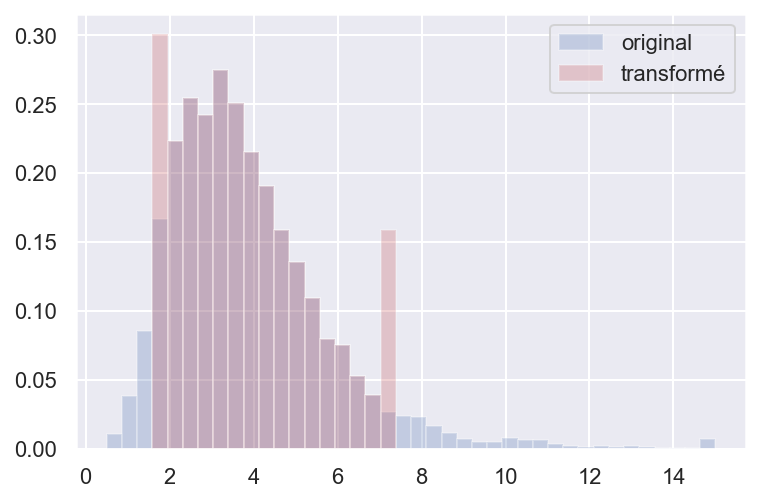

In [20]:
# On crée et "entraine" le modèle
replacer = OutlierReplacer(5, 95)
replacer.fit(X)
Xt = replacer.transform(X)

# Histogramme sur la caractéristique 0
_, bins, _ = plt.hist(X[:, 0], density=True, bins=40, alpha=0.25, color='b')
plt.hist(Xt[:, 0], bins=bins, density=True, alpha=0.25, color='r')
plt.legend(['original', 'transformé']);

**Exercices :** 

Écrire des transformateurs

In [1]:
class node:
    def __init__(self, word, word_count=0, parent=None, link=None):
        self.word = word
        self.word_count = word_count
        self.parent = parent
        self.link = link
        self.children = {}

#tree traversal
    def visittree(self):
        #        if self is None:
        #            return None
        output = []
        output.append(str(vocabdic[self.word]) + " " + str(self.word_count))
        if len(list(self.children.keys())) > 0:
            for i in (list(self.children.keys())):
                output.append(self.children[i].visittree())
        return output


'''      Build FPTREE class and method       '''


class fptree:
    def __init__(self, data, minsup=400):
        #raw data and minminual support
        self.data = data
        self.minsup = minsup

        #null root
        self.root = node(word="Null", word_count=1)

        #each line of transaction with new order from the most frequent items to less
        self.wordlinesort = []
        #node table containing link of all nodes of same word
        self.nodetable = []
        #dictionary contaiing word more than the minsupport count with des order
        self.wordsortdic = []

        #dictionaly containing word and the support count
        self.worddic = {}
        #dictionary with word and it's postion of the support count rank
        self.wordorderdic = {}
#
#        self.preprocess(data)
#        #first scan to build all the necessay dictionary
        self.construct(data)
        #second scan and build fp tree line  by line

    def construct(self, data):
        #get support count for all word
        for tran in data:
            for words in tran:
                if words in self.worddic.keys():
                    self.worddic[words] += 1
                else:
                    self.worddic[words] = 1
        wordlist = list(self.worddic.keys())
        #prune all the world with < min support count
        for word in wordlist:
            if(self.worddic[word] < self.minsup):
                del self.worddic[word]
        #sort the remaing items des, with first word count than work#id
        self.wordsortdic = sorted(
            self.worddic.items(), key=lambda x: (-x[1], x[0]))
        #create a table containing word, wordcount and all link node of that word
        t = 0
        for i in self.wordsortdic:
            word = i[0]
            wordc = i[1]
            self.wordorderdic[word] = t
            t += 1
            wordinfo = {'wordn': word, 'wordcc': wordc, 'linknode': None}
            self.nodetable.append(wordinfo)
        #construct fptree line by line

        for line in data:
            supword = []
            for word in line:
                #only keep words with support count higher than minsupport
                if word in self.worddic.keys():
                    supword.append(word)
           #insert words to the fp tree
            if len(supword) > 0:
                #reorder the words
                sortsupword = sorted(
                    supword, key=lambda k: self.wordorderdic[k])
                self.wordlinesort.append(sortsupword)
                #enter the word one by one from begining
                R = self.root
#                print(sortsupword)
                for i in sortsupword:
                    if i in R.children.keys():
                        R.children[i].word_count += 1
                        R = R.children[i]
                    else:

                        R.children[i] = node(
                            word=i, word_count=1, parent=R, link=None)
                        R = R.children[i]
                        # link this node to nodetable
                        for wordinfo in self.nodetable:
                            if wordinfo["wordn"] == R.word:
                                # find the last node of the  node linklist
                                if wordinfo["linknode"] is None:
                                    wordinfo["linknode"] = R
                                else:
                                    iter_node = wordinfo["linknode"]
                                    while(iter_node.link is not None):
                                        iter_node = iter_node.link
                                    iter_node.link = R

# create transactions for conditinal tree
    def condtreetran(self, N):
        if N.parent is None:
            return None

        condtreeline = []
        #starting from the leaf node reverse add word till hit root
        while N is not None:
            line = []
            PN = N.parent
            while PN.parent is not None:
                line.append(PN.word)
                PN = PN.parent
            #reverse order the transaction
            line = line[::-1]
            for i in range(N.word_count):
                condtreeline.append(line)
            #move on to next linknode
            N = N.link
        return condtreeline

#Find frequent word list by creating conditional tree
    def findfqt(self, parentnode=None):
        if len(list(self.root.children.keys())) == 0:
            return None
        result = []
        sup = self.minsup
        #starting from the end of nodetable
        revtable = self.nodetable[::-1]
        for n in revtable:
            fqset = [set(), 0]
            if(parentnode == None):
                fqset[0] = {n['wordn'], }
            else:
                fqset[0] = {n['wordn']}.union(parentnode[0])
            fqset[1] = n['wordcc']
            result.append(fqset)
            condtran = self.condtreetran(n['linknode'])
            #recursively build the conditinal fp tree
            contree = fptree(condtran, sup)
            conwords = contree.findfqt(fqset)
            if conwords is not None:
                for words in conwords:
                    result.append(words)
        return result

#check if tree hight is larger than 1
    def checkheight(self):
        if len(list(self.root.children.keys())) == 0:
            return False
        else:
            return True


min_sup = 4

test_data = [['I1', 'I2', 'I5'],
             ['I2', 'I4'],
             ['I2', 'I3'],
             ['I1', 'I2', 'I4'],
             ['I1', 'I3'],
             ['I2', 'I3'],
             ['I1', 'I3'],
             ['I1', 'I2', 'I3', 'I5'],
             ['I1', 'I2', 'I3']]


fp_tree = fptree(test_data, min_sup)  # create FP tree on data

print("\n========== Printing Frequent Word Set on " + i + " ==========")
frequentwordset = fp_tree.findfqt()  # mining frequent patt
frequentwordset = sorted(frequentwordset, key=lambda k: -k[1])


#print frequent patt
for word in frequentwordset:
    count = (str(word[1])+"\t")
    words = ''
    for val in word[0]:
        words += (str(vocabdic[val])+" ")
    print(count+words)


#print conditional fp tree height >1
for i in fp_tree.nodetable[::-1]:
    lines = fp_tree.condtreetran(i['linknode'])
    condtree = fptree(lines, min_sup)
    if(condtree.checkheight()):
        print('Condtional FPTree Root on '+(vocabdic[i['wordn']]))
        print(condtree.root.visittree())




NameError: name 'i' is not defined